# Data analysis-based Machine Learning foundation

## 参考文献
- [常用概率分布及python实现](https://zhuanlan.zhihu.com/p/53372254):帮助我使用python来完成对均匀分布-正态分布-幂级分布的可视化。
- [北京理工大学-Python机器学习应用](https://www.icourse163.org/course/BIT-1001872001)：适合用来对算法的分类归纳，入门初期的读物。
- [特征工程](https://blog.csdn.net/qq_20412595/article/details/81623489)：详细的介绍了特征工程和数据预处理部分的算法都有哪些，是本笔记中该部分的主要参考对象
- [数据标准化、归一化](https://blog.csdn.net/ruthywei/article/details/80980746):数据标准化的推导过程以及调用方式

## 一、Course Content
该课程的内容主要有如下部分：
- Introduction to Data Thinking:如何来从不同的角度构建一个数据可视化项目，帮助我们挖掘一些结论。
    - 使用Python画出来常见的分布柱状图
        - 均匀分布
        - 正态分布
        - 幂级分布
    - 数据挖掘可以给你带来什么？
- Machine Learning :机器学习的具体流程，详细的介绍了一下
    - A 机器学习方向的划分方式
    - B 机器学习问题类型的划分
    - C 机器学习流程 
    - D 特征工程和数据预处理
        - 数据预处理的基本公式和方法
        - 数据标准化的常用方法 **重要** **代码**
        - 特征工程
            - 特征选择
            - 特征生成
    - E 模型选择、训练、评估
        - 评估指标
            - K-Fold **重要**
        - 鸢尾花分类实例 完成的讲述了机器学习开发的流程 **重要** **代码**
- What the data can do:培养数据分析师的大局观，粗略查看。

## 二、Introduction to Data Thinking
（对应课程的第一部分的第一章和第二章）<br>
[知乎问题带来的思考：是什么导致了财富的分布](https://www.zhihu.com/question/62250384)
    
该问题讲述的是房间内有100人，每个人的基础都是100块，每分钟随机分配给另一个人1块，最后这个房间内的财富分配是属于幂级函数的一个分布。也就是意味着会产生很多的穷人和很少的富人。这个例子本身给我带来印象确实是深刻的，下面详细描述下具体他都讲述了这个问题所带来的哪些思考

### A 如何从数据或算法中挖掘或建模得到我们所想要的信息
因为大多数情况下，我们是有已知的数据但是不知该如何去挖掘数据。而提出来的这个问题呢，我们可以尽可能的使用算法来模拟理想状态下的数据，然后在理想的状态下去得到一个理想结果。<br>

我们还是跟着上面的问题走，可以点进去知乎的问题链接好好地思考下这个问题。课程里给出来了三个分布模型，作为我们的答案选项之一

#### 均匀分布

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


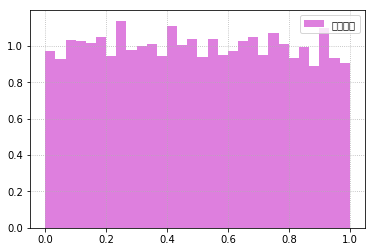

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.random.rand(10000)
t = np.arange(len(x))
# plt.plot(t, x, 'g.', label=u'均匀分布')  # 散点图
plt.hist(x, 30, color='m', alpha=0.5, label=u'均匀分布', normed=True)
plt.legend(loc='upper right')
plt.grid(True, ls=':')
plt.show()

#### 正态分布
好的少 差的也少

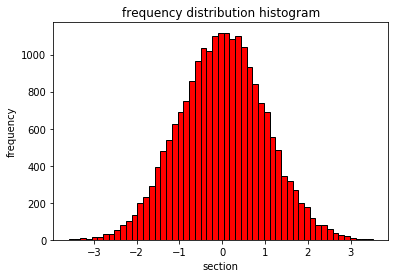

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# randn函数返回一个或一组样本，具有标准正态分布。 
z=np.random.randn(21111)
# 将上面返回的符合正态分布的数据绘制成直方图
plt.hist(z,bins=53,facecolor='red',edgecolor='black')
plt.xlabel("section")
plt.ylabel('frequency')
plt.title("frequency distribution histogram")
plt.show()

#### 幂级分布
穷者愈穷 富者愈富<br>
参考链接：[幂级分布和指数分布的差别](https://www.jianshu.com/p/610654390f6a)

mean: 0.9644151779053296


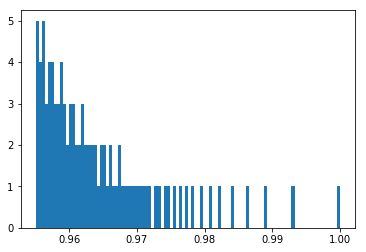

In [3]:
# power-law distribution
# y = x ** c

x = list(range(1,100))
# c值越大 贫富差距越大
c = -0.01 
y = [i**c for i in x]
# print(x)
# print(y)
print('mean: {}'.format(sum(y)/len(y))) # power-law has no mean
# 折线图的效果
# plt.plot(x,y)
# plt.show()
# 具体的画图效果受c的值的影响
plt.hist(y,100)
plt.show()

根据课程讲师给到的程序结果的GIF图如下：

![问题结果1](Images\CourseDevelopment-1.webp)

很直观的我们可以知道贫富差距是存在，但是具体的情况到底会有多坏呢？

![问题结果2](Images\CourseDevelopment-2.webp)

<br>上图很直观的就让我们发现最终的结果是符合**幂级分布**。

视频中对于该问题的发散：究竟是什么在影响贫富差距的存在？屌死是否可以逆袭？富二代是否可以一直是富二代？这个我在笔记中就不去重复赘述，参考知乎问题下面的这个回答可以很好地去发散了解。[到底是什么在影响着财富的分配](https://www.zhihu.com/question/62250384/answer/201726206)


虽然课程讲解这个问题的目的是为了让我们更加直观的面对数据所带来的一些作用，我们甚至可以使用一个模型去粗糙的估计一个结果--**同等基础下随着社会的发展，会产生更多的穷人和更少的富人，这可能是反认知的。**<br><br>
<hr>

**让我们从上面的问题中抽离出来，从无中生有的数据中得到一些对于社会现象的直观了解，是不是会让你对数据分析产生巨大的改观，真正的了解到你所作的事情是有意义的。**

### B 数据挖掘可以给你带来什么

课程的第二个例子讲解的是：房价可视化与人口之间的关系。由于在网上搜索，并没有找到该课程的一个比较好的笔记，下面只能用截图和文字来描述下，这种通过房价热力图和人口热力图的对比角度考虑房价与人口之间数据挖掘方式的震撼。也直接使用一些课程老师做过的项目的实战案例，直观的告诉你数据挖掘可以做什么！比如甚至使用人口流动和人口分布的对比得出：西安-郑州-程度-福州厦门是后续发展的强力城市的结论。

#### B1 第一个问题：中介网站是否抬高 了房价？


上海市房价交易中心的房价中位数是 **265万**
![上海市房屋交易中心房价分布](Images\CourseDevelopment-3.png)

大型中介网站挂牌房价分布的房价中位数是 **320万**
![大型中介网站挂牌房价分布](Images\CourseDevelopment-4.png)

结论：中介网站抬高了房价？<br>
问题：
- 房屋交易中心的数据是一手房
- 中介网站的数据都是二手房
- 市场经济
- 通货膨胀

#### B2 第二个问题：一手房和二手房对价格的是否会有影响
想要回答这个问题，课程首先画出来了房价交易中心房价分布地图，蓝色越深代表交易量越大： 2005年（市中心）-2010年（往外扩张）-2015年（市中心基本没有挂牌房子）
<br>
<img src="Images\CourseDevelopment-5.png" width="600" height="400" alt="2005年" align=center>
<img src="Images\CourseDevelopment-6.png" width="600" height="400" alt="2010年" align=center>
<img src="Images\CourseDevelopment-7.png" width="600" height="400" alt="2015年" align=center>

然后我们在来比较下同一时刻的房屋交易中心房源分布和某中介网站房源分布的地图分布：
<br>
<img src="Images\CourseDevelopment-9.png" width="600" height="400" alt="同一时期的不同分布" align=center>


**从图中可以看出，同一时期的二手房和新房的地理位置存在明显差异。所以之前的结论：~~中介网站抬高了房价~~ 并不成立！**

#### B3 第三个问题：如何去避免出现上面B2先入为主的问题？
**多维数据比较验证**<br>


##### 人口普查数据和房价地图的对比
<img src="Images\CourseDevelopment-10.png" width="600" height="400" alt="人口普查数据和房价地图的对比" align=center>

#####  企业经济普查数据与房价地图的对比
<img src="Images\CourseDevelopment-11.png" width="600" height="400" alt="企业经济普查数据与房价地图的对比" align=center>

### C 数据的价值取决于使用它的人！

### D 数据可视化的介绍

<img src="Images\CourseDevelopment-12.png" width="600" height="400" alt="图表与对应的用处" align=center>

#### D.1 数据分析的流程

<img src="Images\CourseDevelopment-14.png" width="600" height="400" alt="流程图" align=center>

#### D2.推荐网站或模型
- [数据可视化竞赛](https://www.informationisbeautifulawards.com/)
- [D3-js可视化库](https://d3js.org/)

## 三、Machine Learning

### A 机器学习方式划分

- 监督学习：subpervised=label，Whether there is supervision is judged by whether the input data has tags.(是否有监督是通过输入的数据是否有标签来判断)
- 非监督学习:Self-learning,do`t have lable,do`t have prompt.
- 半监督学习:a little data have lable.
- 强化学习:Reinforcement learning is often described as learning by delaying rewards. In reinforcement learning, feedback may take several steps after a decision is made. It's not like telling you this is right in supervised learning, it's wrong, or looking for description or generalization in unsupervised learning. It's like playing a game without knowing the rules. No one tells you what to do, it's totally up to you. But after a while, it will tell you whether the reward is negative or positive, or whether the game is losing or winning. It feels like life.(强化学习通常描述为通过延迟奖赏来进行学习。在强化学习中，可能在作出决策后经过几个步骤才产生反馈。不像是在监督学习里告诉你这样是对的，而那样是错的，也不像非监督学习里寻找描述或者进行概括。这就像是在进行一场不知道规则的游戏，没有人告诉你要做什么，完全要依靠自己。不过每过一段时间会告诉你奖励是负还是正，或者游戏是输还是赢。感觉就像人生一样。)
#### 比较
- 在监督学习中，有一个很好区分标签数据的模型，找到一个可以达成目标的函数。
- 在强化学习中，试着找出一个最好表现的行为
- 在非监督学习中，需要找出一种标准，然后找到一个放来将数据归类，使其表现良好。

### B 机器学习问题类型的划分


**连续变量为回归，离散变量为分类**
- 分类：类别区分 判定某朵花的数据属于哪类
    - KNN：K近邻算法
    - Decision Tree：决策树
    - Naive Bayes：[朴素贝叶斯理论推导](https://www.jianshu.com/p/b6cadf53b8b8)
    - SVM(Support vector machines)：[支持向量机](https://blog.csdn.net/ybsun2010/article/details/9042369)、[SVM支持向量机入门及数学原理](https://blog.csdn.net/qq_35992440/article/details/80987664)
- 回归：数据类型 如房价预测
    - Linear regression：线性回归
    - Ridge regression:岭回归
    - Logistic regression：逻辑回归
- 聚类：通过数据的潜在特性把相似或接近的数据归类在一起
    - K均值算法
    - Adaboost ：[分类器](http://www.uml.org.cn/sjjmwj/2019030721.asp)
    - Random Forest:随机森林
    

### C 机器学习的流程 重要
首先我们拿到一个数据，然后我们需要通过特征工程和数据预处理将数据处理称为可以用于各种模型的参数形式。这就需要我们先学习特征工程，然后才是学习各种模型。之后呢，我们进行模型的开发，开发出来之后如何进行模型的效果判断？这就涉及到模型的评价。模型评价与我们的目标息息相关，根据目标选择不同的模型评价方法，进行效果判定。最后选出效果最好的一种模型来进行预测，这就是整个机器学习开发的流程。<br>

**虽然算法是非常重要的环节，但是由于如果我们不能对数据进行一个预处理和特征工程，那么整个数据是否可以用于判定都存疑的。而即便我们做出来一个算法，如何去判定他是最优解，也是存疑的。下面就介绍下 特征工程和数据预处理，以及模型评价方法。为后续的模型学习指定一个方向，也为模型选择打下基础。**

<img src="Images\CourseDevelopment-15.png" width="600" height="400" alt="机器学习的流程" align=center>

###  D 特征工程和数据预处理

**数据和特征决定了机器学习的上线，而模型和算法只是逼近这个上线而已**。顾名思义，本质是一项工程活动，目的是最大限度的从原始数据中提取特征以供算法和模型使用，特征工程包括以下方面：
<img src="Images\CourseDevelopment-16.jpg" width="800" height="800" alt="特征工程" align=center>


特征处理是特征工程的核心部分，sklearn提供了较为完整的特征处理方法，包括数据预处理，特征选择，降维等。

#### D1 数据预处理
##### 目的
- 将数据整理为模型可以处理的格式
- 将质量差的数据进行整理，使得模型可以有效地的学到更好的效果

##### 方法
- 缺失值处理
    - 舍弃缺失严重的数据
    - 填充缺失值（）
- 无量纲化：使不同规格的数据转换到同一规格。有标准化和缩放法
    - 标准化：标准化的前提是特征值服从正态分布，标准化后，其转换成标准正态分布。在sklearn中公式表达为$x^*=\frac{x-\overline{X}}{s}$
        - min-max标准化：$x^* = \frac{x-min}{max-min}$,max为样本数据的最大值，min为样本数据的最小值。
```
from sklearn.preprocessing import StandardScaler
#标准化，返回值为标准化后的数据
StandardScaler().fit_transform(iris.data)
```
        - z-score标准化：z标准化就是SPSS中最常用的标准化方法，也叫标差保准化。这种方法给予原始数据的均值（mean）和标准差（standard deviation）进行数据的标准化。经过处理的数据符合标准正态分布，即均值为0，标准差为1，其转化函数为：$ x^* = \frac{(x-\mu)}{\sigma}$
    - 区间缩放法：利用了边界值信息，将特征的取值区间缩放到某个特点的范围，例如[0,1]等。区间缩放法的思路很多，常见的还是利用两个最值进行缩放，公式$x^* = \frac{x-min}{max-min}$

以下代码来源：[数据标准化的常用方法](http://www.luyixian.cn/news_show_273495.aspx)，对我们的数据进行标准化处理。

In [4]:
# -*-coding:utf-8-*-
import numpy as np
import math
'''
around(arr,decimals=?)？表示保留多少位小数
'''


class Datanorm:
    def __init__(self):
        self.arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
        self.x_max = self.arr.max() #数组元素中的最大值
        self.x_min = self.arr.min() #数组元素中的最小值
        self.x_mean = self.arr.mean() # 数组元素中平均值
        self.x_std = self.arr.std() #数组元素中的标准差

    def Min_MaxNorm(self):
        arr = np.around(((self.arr - self.x_min) / (self.x_max - self.x_min)), decimals=4)
        print("Min_Max标准化:{}".format(arr))

    def Z_ScoreNorm(self):
        arr = np.around((self.arr - self.x_mean) / self.x_std, decimals=4)
        print("Z_Score标准化:{}".format(arr))

    def Decimal_ScalingNorm(self):
        power = 1
        maxValue = self.x_max
        while maxValue / 10 >= 1.0:
            power += 1
            maxValue /= 10
        arr = np.around((self.arr / pow(10, power)), decimals=4)
        print("小数定标标准化:{}".format(arr))

    def MeanNorm(self):
        first_arr = np.around((self.arr-self.x_mean) / (self.x_max - self.x_min), decimals=4)
        second_arr = np.around((self.arr - self.x_mean)/self.x_max, decimals=4)
        print("均值归一法：\n公式一:{}\n公式二:{}".format(first_arr, second_arr))

    def Vector(self):
        arr = np.around((self.arr/self.arr.sum()), decimals=4)
        print("向量归一法:{}".format(arr))

    def exponeential(self):

        first_arr = np.around(np.log10(self.arr) / np.log10(self.x_max), decimals=4)
        second_arr = np.around(np.exp(self.arr)/sum(np.exp(self.arr)), decimals=4)
        three_arr = np.around(1/(1+np.exp(-1*self.arr)), decimals=4)
        print("lg函数:{}\nSoftmax函数:{}\nSigmoid函数:{}\n".format(first_arr,second_arr,three_arr))


if __name__ == "__main__":
    
    a = Datanorm()
    print("处理前的数据：",a.arr)
    a.Min_MaxNorm()
    a.Z_ScoreNorm()
    a.Decimal_ScalingNorm()
    a.MeanNorm()
    a.Vector()
    a.exponeential()

处理前的数据： [1 2 3 4 5 6 7 8 9]
Min_Max标准化:[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]
Z_Score标准化:[-1.5492 -1.1619 -0.7746 -0.3873  0.      0.3873  0.7746  1.1619  1.5492]
小数定标标准化:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
均值归一法：
公式一:[-0.5   -0.375 -0.25  -0.125  0.     0.125  0.25   0.375  0.5  ]
公式二:[-0.4444 -0.3333 -0.2222 -0.1111  0.      0.1111  0.2222  0.3333  0.4444]
向量归一法:[0.0222 0.0444 0.0667 0.0889 0.1111 0.1333 0.1556 0.1778 0.2   ]
lg函数:[0.     0.3155 0.5    0.6309 0.7325 0.8155 0.8856 0.9464 1.    ]
Softmax函数:[2.000e-04 6.000e-04 1.600e-03 4.300e-03 1.160e-02 3.150e-02 8.560e-02
 2.326e-01 6.322e-01]
Sigmoid函数:[0.7311 0.8808 0.9526 0.982  0.9933 0.9975 0.9991 0.9997 0.9999]



#### D2 特征工程

- 特征选择：feature_selection
    - 原因
        - 降低复杂度
        - 降低噪音
        - 增加模型可读性
    - 方法
        - 过滤法：按照发散性或者相关性对每个特征进行评分，设定阈值或者选择阈值的个数，选择特征。
        - 包装法：根据目标函数，通常是预测效果评分，每次选择若干特征或者排除若干特征
        - 嵌入法：先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征


- 特征生成：当特征选择完成之后，可以直接训练模型了，但是可能由于特征矩阵过大，导致计算量大，训练时长的问题，因此降低特征矩阵维度也是必不可少的。常见的降维方法有主成分分析法（PCA）和线性判别分析（LDA）。PCA和LDA有很多的相似点，其本质是要将原始的样本映射到维度更低的样本空间中，但是PCA和LDA的映射目标不一样：PCA是为了让映射后的样本具有最大的发散性；而LDA是为了让映射后的样本有最好的分类性能。所以说PCA是一种无监督的降维方法，而LDA是一种有监督的降维方法。
    - 主成分分析PCA
    - 线性判别分析LDA

### E 模型选择、训练、评价

#### E-3 评价指标

**评价方法**
- **留出**：把训练数据中的一部分，比如30%的数据留出来不参与模型的训练。当模型训练好之后，用这组数据来检验模型。
- **交叉验证**：常用的为k-fold交叉验证。把数据分成k部分，分k次进行验证，每次取出一份数据作为验证数据，用其余k-1分数据参与训练。最后根据k的总效果评价模型的好坏。

在机器学习建模中，通常的做法是讲数据分为训练集和测试集。测试集是与训练独立的数据，完全不参与训练，用于最终模型的评估。在训练过程中，经常会出现过拟合的问题，<u>就是模型可以很好的匹配训练数据，却不能很好的预测训练集外的数据</u>，如果此时就使用测试数据来调整模型参数，就相当于在训练时已知部分测试数据的信息，会影响最终结果的准确性，通常的做法是在训练中在分出一部分作为验证数据，用来评估模型的训练效果。<br>

验证数据取自训练数据，但不参与训练，这样可以相对客观的评估模型对于训练集之外数据的匹配程度。模型在验证数据中的评估常用的是交叉验证，又称循环验证。它将原始数据分成K组(K-Fold)，将每个子集数据分别做一次验证集，其余的K-1组子集数据作为训练集，这样会得到K个模型。这K个模型分别在验证集中评估结果，最后的误差MSE(Mean Squared Error)加和平均就得到交叉验证误差。交叉验证有效利用了有限的数据，并且评估结果能够尽可能接近模型在测试集上的表现，可以做为模型优化的指标使用。<br>


#### E-4 鸢尾花分类实例
对所有的花的判断结果正确的比例最高<br>
精确度=预测正确的结果数/总结果数

In [6]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import tree

data=pd.read_csv('Data\iris.csv')
# print(data)
data.columns=['index','花萼长度','花萼宽度','花瓣长度','花瓣宽度','标签']
# 数据预处理部分参考文章 https://zhuanlan.zhihu.com/p/63931493
map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
data['标签'] = data['标签'].map(map)
# print(data['标签'])

# 数据和课程有出入
X=data.iloc[:,1:5]
Y=data.iloc[:,5]

# k部分的交叉验证
# 10部分的交叉验证
k=10
kf= KFold(n_splits=k,shuffle = True)

accuracies =[]
i =0

# 拆分
for train_index,test_index in kf.split(data):
    x_train,x_test=X.loc[train_index],X.loc[test_index]
    y_train,y_test=Y.loc[train_index],Y.loc[test_index]
    # 模型选择
    model = tree.DecisionTreeClassifier()
    # 训练
    model.fit(x_train,y_train.astype(int))
    # 预测
    y_predict=model.predict(x_test)
    
    accuracy=accuracy_score(y_pred=y_predict,y_true=y_test)
    accuracies.append(accuracy)
    
    i+=1
    print('decision tress 第{}轮: {}'.format(i,accuracy))

print('dicision tree',np.mean(accuracies))

decision tress 第1轮: 1.0
decision tress 第2轮: 0.9333333333333333
decision tress 第3轮: 0.9333333333333333
decision tress 第4轮: 1.0
decision tress 第5轮: 0.8666666666666667
decision tress 第6轮: 1.0
decision tress 第7轮: 1.0
decision tress 第8轮: 0.9333333333333333
decision tress 第9轮: 0.8666666666666667
decision tress 第10轮: 0.9333333333333333
dicision tree 0.9466666666666667


**跟着上述的代码，我们理一下机器学习的简单开发思路：**<br>
1. 数据预处理：将标签由字符串的形式转换为数值型 0 1 2，然后将整体的数据切分为X(参数)和Y(结果)。
2. 交叉验证：使用K-flode交叉验证来切分训练集为k份，具体的解释上文有。通过多次的训练获得最终的平均训练精度，每次训练的时候都可以得到一个精度，然后求平均值得到平均精度
3. 模型选择：导入sklearn的决策树模型
4. 训练模型：将训练集传入模型中
5. 预测结果：将测试集的参数传入模型得到一个预测值序列
6. 通过accuracy_score来评价模型的精度,精度= 预测正确/所有预测数

课程中使用的 Spider 也是十分的不错，可以比较直观的查看到 variable,附上在Spyder中跑上述代码的效果图
<img src="Images\CourseDevelopment-17.png" width="800" height="800" alt="决策时-交叉验证" align=center>

**更换多种模型来比较哪种的预测精度更高**<br>
- 朴素贝叶斯
- SVM支持向量机
- 随机森林分类树
- GBDT梯度提升树
- MLP多层网络

In [9]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn import naive_bayes
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

data=pd.read_csv('Data\iris.csv')
# print(data)
data.columns=['index','花萼长度','花萼宽度','花瓣长度','花瓣宽度','标签']
# 数据预处理部分参考文章 https://zhuanlan.zhihu.com/p/63931493
map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
data['标签'] = data['标签'].map(map)
# print(data['标签'])

# 数据和课程有出入
X=data.iloc[:,1:5]
Y=data.iloc[:,5]

# k部分的交叉验证
# 10部分的交叉验证
k=10
kf= KFold(n_splits=k,shuffle = True)

# 传入模型 所以我们并不需要选择模型 
def eval_model(model_name,model):
    accuracies =[]
    i =0
    # 拆分
    for train_index,test_index in kf.split(data):
        x_train,x_test=X.loc[train_index],X.loc[test_index]
        y_train,y_test=Y.loc[train_index],Y.loc[test_index]
        # 训练
        model.fit(x_train,y_train.astype(int))
        # 预测
        y_predict=model.predict(x_test)

        accuracy=accuracy_score(y_pred=y_predict,y_true=y_test)
        accuracies.append(accuracy)

        i+=1
    print(model_name,np.mean(accuracies))

# 构建模型函数字典方便遍历调用函数
# lambda 匿名函数 直接传入函数即可，但是注意我们在遍历的时候 需要加（）
models ={
    'decision tree':lambda:tree.DecisionTreeClassifier(),
    'random forest':lambda:RandomForestClassifier(),
    'naive bayes':lambda:naive_bayes.GaussianNB(),
    'SVM':lambda:svm.SVC(),
    'GBDT':lambda:GradientBoostingClassifier(),
    'MLP':lambda:MLPClassifier(max_iter=1000)
}
# 通过遍历字典 引入模型
for mname,m in models.items():
    eval_model(mname,m())

decision tree 0.9200000000000002
random forest

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.9466666666666667
naive bayes 0.9400000000000001
SVM 0.9733333333333334


D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'aut

GBDT 0.9533333333333334
MLP 0.9733333333333334


## 四、What the data can do
用什么数据解决什么问题<br>
数据=data<br>
解决=how<br>
问题=what<br>

这一部分的内容，主要是介绍下数据分析师的就业场景，如何使用数据来帮助企业解决一些实际的问题。这个章节的内容非常适合做课题或者做项目的同学来做一个拓展，做一个大概的浏览即可，干货不多！